In [122]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, statsmodels.api as sm, warnings
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, scale
from sklearn.decomposition import PCA
from sqlalchemy import create_engine

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

house_df = pd.read_sql_query('select * from houseprices', con=engine)
engine.dispose()
house_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [123]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [124]:
house_df = house_df.select_dtypes(exclude=['object'])
house_df.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


[21.63 29.94 37.06 42.44 46.48 49.79 53.01 56.01 59.   61.91 64.75 67.48
 70.18 72.61 75.02 77.37 79.59 81.67 83.68 85.64 87.44 89.14 90.73 92.12
 93.36 94.4  95.41 96.26 96.97 97.64 98.18 98.64 99.04 99.41 99.72 99.99]


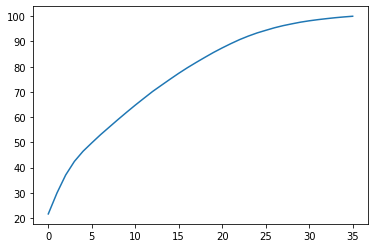

In [137]:
# Determine marginal utility of number of principal components
house_df = house_df.dropna()
X_hdf = scale(house_df)
pca = PCA(n_components=36)
pca.fit(X_hdf)
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)
plt.plot(var1)
plt.show()

#Xt = X_hdf.T
#Cx = np.cov(Xt)
#eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)
#plt.plot(eig_val_cov)
#plt.show()
#print(eig_val_cov)

In [138]:
# PCA and deriving coefficients
sklearn_pca = PCA(n_components=25)
Y_sklearn = sklearn_pca.fit_transform(X_hdf)
Y = house_df['saleprice']
X = Y_sklearn
lrm = linear_model.LinearRegression()
lrm.fit(X,Y)

print('Coefficients: ', lrm.coef_)
print('Intercept: ', lrm.intercept_)

Coefficients:  [25593.81414433 -1196.90846778  2657.67408072 -4003.27475539
 -9079.13751622 -2612.1957148    811.56009058   860.28494887
 -6816.99491793 -2741.48108433 -5971.24095628 -2080.31772016
  3587.30562845  4072.5277545  -2474.9574788  -1983.98682157
 -3409.92078142  4783.21515373  4331.29711604 -1781.10809693
 -3015.99350012  2485.29437141  2560.20144247  4209.11442417
 -5017.41663603]
Intercept:  185506.15254237287


In [139]:
# OLS Summary
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     234.5
Date:                Thu, 05 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:15:55   Log-Likelihood:                -13251.
No. Observations:                1121   AIC:                         2.655e+04
Df Residuals:                    1095   BIC:                         2.668e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.855e+05    994.615    186.511      0.000    1.84e+05    1.87e+05
x1          2.559e+04    346.908     73.777      0.000    2.49e+04    2.63e+04
x2         -1196.9085    559.584     -2.139      0.033   -2294.887     -98.930
x3          2657.6741    604.609      4.396      0.000    1471.351    3843.997
x4         -4003.2748    695.869     -5.753      0.000   -5368.662   -2637.887
x5         -9079.1375    802.669    -11.311      0.000   -1.07e+04   -7504.194
x6         -2612.1957    886.637     -2.946      0.003   -4351.895    -872.497
x7           811.5601    899.348      0.902      0.367    -953.079    2576.199
x8           860.2849    931.119      0.924      0.356    -966.694    2687.263
x9         -6816.9949    933.426     -7.303      0.000   -8648.500   -4985.490
x10        -2741.4811    945.750     -2.899      0.004   -4597.168    -885.794
x11        -5971.2410    957.317     -6.237      0.000   -7849.624   -4092.858
x12        -2080.3177    977.120     -2.129      0.033   -3997.557    -163.079
x13         3587.3056    981.778      3.654      0.000    1660.926    5513.685
x14         4072.5278   1034.373      3.937      0.000    2042.950    6102.105
x15        -2474.9575   1039.525     -2.381      0.017   -4514.644    -435.271
x16        -1983.9868   1053.109     -1.884      0.060   -4050.327      82.353
x17        -3409.9208   1083.276     -3.148      0.002   -5535.453   -1284.389
x18         4783.2152   1118.224      4.278      0.000    2589.111    6977.319
x19         4331.2971   1138.148      3.806      0.000    2098.100    6564.495
x20        -1781.1081   1151.084     -1.547      0.122   -4039.687     477.471
x21        -3015.9935   1201.378     -2.510      0.012   -5373.256    -658.731
x22         2485.2944   1238.052      2.007      0.045      56.071    4914.517
x23         2560.2014   1281.248      1.998      0.046      46.222    5074.181
x24         4209.1144   1367.195      3.079      0.002    1526.496    6891.733
x25        -5017.4166   1448.795     -3.463      0.001   -7860.145   -2174.688
==============================================================================
Omnibus:                      474.563   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72292.388
Skew:                          -0.853   Prob(JB):                         0.00
Kurtosis:                      42.304   Cond. No.                         4.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""